<a href="https://colab.research.google.com/github/Avinash-Reddy-Kovvuri/Basic-ML/blob/main/Capstone_PROject_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drinking_water Dataset**

As the above mentioned dataset is extraced from famous ML and Datascience platform kaggle which is a csv file. It contains information relavant to the water sample and used this data in columns to predict the potability of drinking water(Given sample).

> To generate final result that is to predict the potability of water sample given ,we need to buit machine learning model.
*   Exploratory data analysis.
*   Data Cleaning / Preprocessing.
*   Building Macine learning Model.












## **Exploratory data analysis**



> It is also known as EDA which mainly focus on analysing or exploring the data manually or in form of pictorial representation to know well about it before working on it.









To do this we need to import some libraries for Data manipulation along with the Data visualization

In [3]:
# Need to import relavant libraries to work on the data in csv file(Drinking_water.csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the data to variable Data
Data = pd.read_csv("Drinking_water.csv")

In [5]:
Data.shape

(3276, 13)

Through the above code it is known that the data contains the 3276 observations or water samples from different source and 13 features or columns.

In [6]:
Data.columns

Index(['Unnamed: 0', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability', 'Carcinogenics', 'medical_waste'],
      dtype='object')

Through this we came across to know that names of the columns that were in following data set

In [7]:
Data.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Carcinogenics,medical_waste
0,0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,NaN,NaN
1,1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,NaN,NaN
2,2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,NaN,NaN
3,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,NaN,NaN
4,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,NaN,NaN


In [8]:
Data.tail()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Carcinogenics,medical_waste
3271,3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,NaN,NaN
3272,3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1,NaN,NaN
3273,3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1,NaN,NaN
3274,3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1,NaN,NaN
3275,3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1,NaN,NaN


By using these two operation we used to visualize the sample that is five five and last five observations of the data in tabular format



> And through this we know that the Potability is the resultant or the value need to predicted by the Machine learing model by the relavant information regarding on the water sample given whether to drink the water or not ? ...



In [9]:
Data.Potability.unique()

array([0, 1])

The resultant data which is Potability is just of values 1 or 0 which represents that whether to drink water or not by the data given by the sample water.

In [10]:
#checking the null values in above dataset
Data.isnull().sum()

Unnamed: 0            0
ph                  491
Hardness              0
Solids                0
Chloramines           0
Sulfate             781
Conductivity          0
Organic_carbon        0
Trihalomethanes     162
Turbidity             0
Potability            0
Carcinogenics      3276
medical_waste      3276
dtype: int64




1.   From this we came across with that some columns has huge number of missing values in it.
2.   From the above code the null values present in columns ph, Sulfate, Trihalomethanes were about 15%, 24%, 5% of the total data.
3.    And both Carcinogenics and medical_waste  are almost null that is the total null values is equal to the total number of observations.

> Further process regarding on this is done in Data Cleaning / Preprocessing.




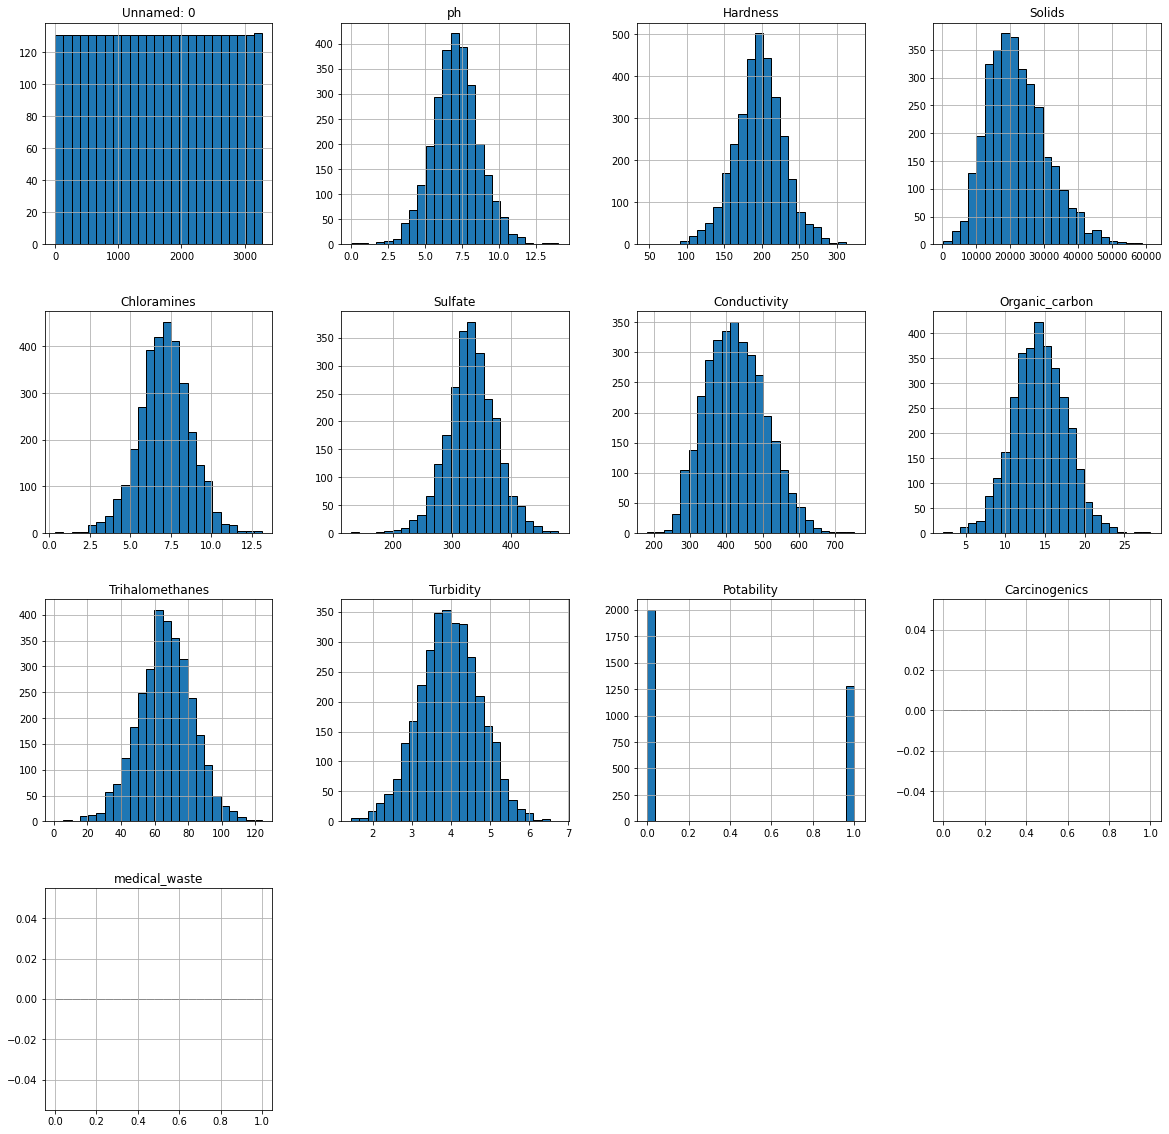

In [11]:
Data.hist(edgecolor='black',bins = 25, figsize= (20,20))
plt.show()

From these visual Data Analysis we came to know the data which is interrelated itself to the values which need to be predicted and among themselves.
And about some columns which effect the Potability of the water a lot 

## **Data Cleaning / Preprocessing**



> In this Data Cleaning / Preprocessing is used to 
*   Handling Missing values
*   Scaling and Normalization
*   Parsing Dates
*   Character Encoding
*   Inconsistent Data Entry
 












Above mentioned processes should be done with respect to the data in the given in form of csv file.

Before going to the cleaning process just look into the **Sample Data**

In [12]:
Data.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Carcinogenics,medical_waste
0,0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,NaN,NaN
1,1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,NaN,NaN
2,2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,NaN,NaN
3,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,NaN,NaN
4,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,NaN,NaN


Hence by looking into it ,we know that the data contains columns which all of are floating values.so,the data is completely in form of numerical values 

In [13]:
Data.isnull().sum()

Unnamed: 0            0
ph                  491
Hardness              0
Solids                0
Chloramines           0
Sulfate             781
Conductivity          0
Organic_carbon        0
Trihalomethanes     162
Turbidity             0
Potability            0
Carcinogenics      3276
medical_waste      3276
dtype: int64

*   From this we have that the two columns Carcinogenics and medical_waste have 100% of the total missing vlaues.
*   In the process of Data Cleaning / Preprocessing ,we have to drop down the two columns named Carcinogenics and medical_waste and have to look into the other null value columns based on the correlation on the predicted values and percent of missing values. 




In [14]:
Data = Data.drop(['medical_waste','Carcinogenics','Unnamed: 0'],axis=1)
#Droping the unecessary data

And by looking into the Exploratory data analysis that the null values in coulmns ph,Sulfate,Trihalomethanes are of 15%, 14%, 5%.so, we have to remove the rows/observations if null value present in one of the columns in that row.
The below code is used to done it.

In [15]:
Data.dropna(inplace=True,axis=0)

Hence it is used to delete the rows which has atleast one null value in it.

In [16]:
Data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


Hence the number of observations got reduced to 2011 from 3276 after deleting rows with null values in it.



> Hence we can also manage the null values in many other ways like filling those values with constant or central tendency values like mean or median or mode based on its accuracy with the final predicted values.


> But here I proceed with the basic concept that is to delete the data with the atleast one null value in it. 





Now the data is ready to train a machine learning model.

# **Building ML model**



*   Before Building model, we have to separate the data of columns with features and with values to be predicted as y and X
*   And then separate the 20% data in whole data along with the target column which is used to evaluate the performance of the data





> We actually build different type of ML models by using the library Scikit learn by importing it.



In [17]:
# X will contain all the features and y will contain the target variable

y = Data["Potability"]
X = Data.drop("Potability",axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)





> ## **1.Logistic Regression:** 





*   ## **Defining and Fitting model**




In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()  #defining the model
logmodel.fit(X_train,y_train)    # fitting the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Through the above code, we are defining the model specified above and fitting it with the feature values along with the values to be predicted that is both X_train and y_train



*   ## **Accuracy**




In [20]:
predictions = logmodel.predict(X_test) #predicting the final values based on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       248
           1       0.00      0.00      0.00       155

    accuracy                           0.62       403
   macro avg       0.31      0.50      0.38       403
weighted avg       0.38      0.62      0.47       403



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Finally generating the final values by inputing the 20% of the data separated from total data that is train_data and storing those values in predictions and comparing those with the actual values to know the accuracy.



*   ## **Confusion Matrix**



In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[248,   0],
       [155,   0]])

True positive: 248 (We predicted a positive result and it was positive)

True negative: 0 (We predicted a negative result and it was negative)

False positive: 0 (We predicted a positive result and it was negative)

False negative: 155 (We predicted a negative result and it was positive)

 

> ## **2.Decision Tree Regression:**



*   ## **Defining and Fitting model**

In [22]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
# Fit model
model.fit(X_train, y_train)
# get predicted values on validation data

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Through the above code, we are building a Decision Tree Regression model by fit the training data.

*   ## **Accuracy**

In [23]:
from sklearn.metrics import mean_absolute_error
val_predictions = model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

0.4143920595533499





*   Actually there are many ways in measuring the accuracy of the model which mean by evaluating the model based on the output in sklearn.metrics module.
*   But here we are using mean_absolute_error to find it which is imported from sklearn.metrics



> ## **3.Linear Regression:**

*   ## **Defining and Fitting model**

In [24]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Through the above code, we are building a Linear Regression model by fit the training data.

*   ## **Accuracy**

In [25]:
val_predictions = linear_regression.predict(X_test)

print(mean_absolute_error(y_test, val_predictions))

0.4771784903115844





 

*   Actually there are many ways in measuring the accuracy of the model which mean by evaluating the model based on the output in sklearn.metrics module.
*   But here we are using mean_absolute_error to find it which is imported from sklearn.metrics



# **Conclusion**

Now, Here coming up with the conclusion that we are building a machine learning model and to do this we have done the following steps:

*   EDA which is to explore the data by looking the sample and knowing about the data like corelation with respect to the final predicted values and visualizing it in pictorial representation.

*   In Data cleaning process we actually removed or manipulated some of the data which is not that much important/unecessary to build machine learning model by using the functions in library pandas.
* Finally, To built a machine learning model we divided/splitted the data into the ratio 4:1(80% and 20%) to train and test the data by using scikit library
* And then the three models named Logistic regression, Decision Tree Model and Linear regression were used to build the model with the help of scikit library.
* And after evaluating those three models by comparing the actual final values to the values predicted by models to get accuary which enhance the efficiency of the model.


